- Build a Loan Approval Prediction Model using Jupyter Notebook.
Use machine learning techniques to predict whether a loan
application will be approved or not based on various factors such
as applicant income, loan amount, credit history, etc.

In [1]:
#importation of packages
import pandas as pd #data manipulation
import numpy as np #mathematical computations
%matplotlib inline
import matplotlib.pyplot as plt #visaualization
import seaborn as sns #visualization

In [2]:
#load the dataset
dataframe=pd.read_csv("c:\\Users\\ADMIN\\Documents\\Datasets\\loan.csv")
dataframe.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


- The lifecycle in any datascience project or rather it's workflow:
  1. Data Analysis
  2. Feature Engineering
  3. Feature Selection
  4. Model Building
  5. Model Deployment

**Exploratory Data Analysis**

In [3]:
print(len(dataframe))

614


In [4]:
dataframe[dataframe.duplicated(subset=['Loan_ID'],keep=False)]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [5]:
dataframe.shape

(614, 13)

In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
dataframe

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [8]:
dataframe.select_dtypes(include=['object']).head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [9]:
dataframe.Gender.value_counts(dropna=False)

Gender
Male      489
Female    112
NaN        13
Name: count, dtype: int64

In [10]:
dataframe.Married.value_counts(dropna=False)

Married
Yes    398
No     213
NaN      3
Name: count, dtype: int64

In [11]:
dataframe.Dependents.value_counts(dropna=False)

Dependents
0      345
1      102
2      101
3+      51
NaN     15
Name: count, dtype: int64

In [12]:
dataframe.Education.value_counts(dropna=False)

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [13]:
dataframe.Self_Employed.value_counts(dropna=False)

Self_Employed
No     500
Yes     82
NaN     32
Name: count, dtype: int64

In [14]:
dataframe.Property_Area.value_counts(dropna=False)

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [15]:
dataframe['Education'].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [16]:
from typing import List
ordinal={'Education':['Not Graduate','Graduate'],
         'Dependents':['0','1','2','3+'],
         'Property_Area':['Rural','Semiurban','Urban']}

nominal=['Self_Employed','Gender','Married','Loan_Status']         

def convert_to_categorical(dataframe:pd.DataFrame,ordinal:dict,nominal:List)->pd.DataFrame:
    """
    This function converts columns of object datatype
    to be of categorical data type based on list and dictionary that are pre-defined
    to state which type o categorical data they fallunder

    The function returns a dataframe with converted columns
    """
    for col in ordinal.keys():
        dataframe[col]=pd.Categorical(dataframe[col],categories=ordinal[col],ordered=True)
    for col in nominal:
        dataframe[col]=pd.Categorical(dataframe[col])    
    return dataframe
dataframe=convert_to_categorical(dataframe,ordinal,nominal)    

In [17]:
dataframe['Education'].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [18]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Loan_ID            614 non-null    object  
 1   Gender             601 non-null    category
 2   Married            611 non-null    category
 3   Dependents         599 non-null    category
 4   Education          614 non-null    category
 5   Self_Employed      582 non-null    category
 6   ApplicantIncome    614 non-null    int64   
 7   CoapplicantIncome  614 non-null    float64 
 8   LoanAmount         592 non-null    float64 
 9   Loan_Amount_Term   600 non-null    float64 
 10  Credit_History     564 non-null    float64 
 11  Property_Area      614 non-null    category
 12  Loan_Status        614 non-null    category
dtypes: category(7), float64(4), int64(1), object(1)
memory usage: 34.0+ KB


In [19]:
dataframe.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


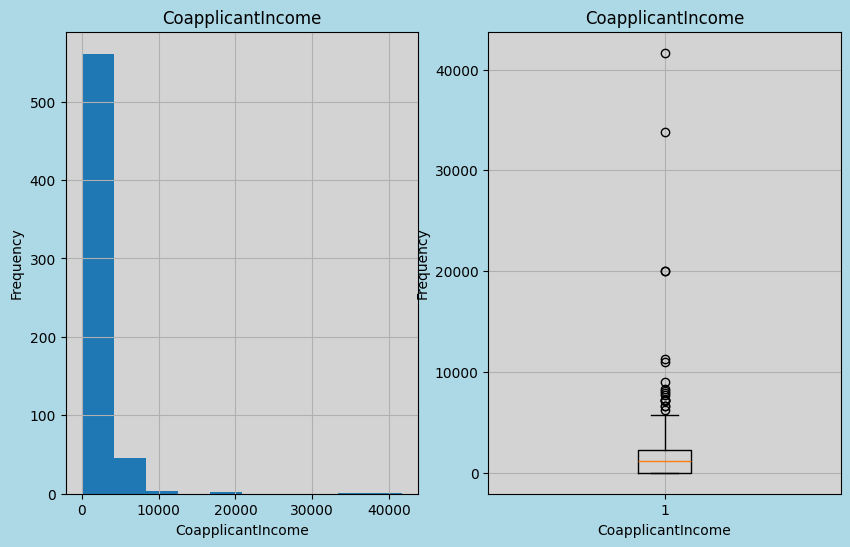

In [20]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,6))
fig.patch.set_facecolor('lightblue')

ax[0].hist(x=dataframe['CoapplicantIncome'])
ax[0].set_title('CoapplicantIncome')
ax[0].set_xlabel('CoapplicantIncome')
ax[0].set_ylabel('Frequency')  #   ax[0:0],ax[1:1]
ax[0].grid(True)
ax[0].set_facecolor('lightgray')

ax[1].boxplot(x=dataframe['CoapplicantIncome'])
ax[1].set_title('CoapplicantIncome')
ax[1].set_xlabel('CoapplicantIncome')
ax[1].set_ylabel('Frequency')
ax[1].grid(True)
ax[1].set_facecolor('lightgray')

In [21]:
dataframe['CoapplicantIncome'].quantile(0.75)

2297.25

In [22]:
print("Beyond 75%",len(dataframe[dataframe['CoapplicantIncome']>2297.25]))
print("Zero",len(dataframe[dataframe['CoapplicantIncome']==0]))
273+154

Beyond 75% 154
Zero 273


427

In [23]:

q3=dataframe['CoapplicantIncome'].quantile(0.75) 
q1=dataframe['CoapplicantIncome'].quantile(0.25)
iq=q3-q1
print(iq)
#lower_limit = q1 - 1.5*iq
upper_limit = q3 + 1.5*iq
print(upper_limit)

2297.25
5743.125


(array([294., 121., 100.,  43.,  25.,  13.,   3.,   6.,   3.,   0.,   1.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.]),
 array([    0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,  7000.,
         8000.,  9000., 10000., 11000., 12000., 13000., 14000., 15000.,
        16000., 17000., 18000., 19000., 20000.]),
 <BarContainer object of 20 artists>)

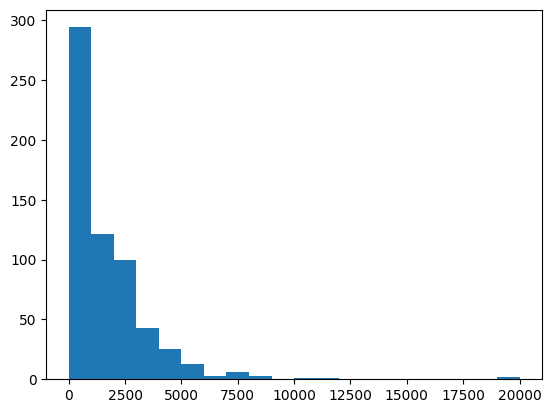

In [24]:
dataframe=dataframe.loc[dataframe['CoapplicantIncome']<=20000]
plt.hist(dataframe['CoapplicantIncome'],bins=20)

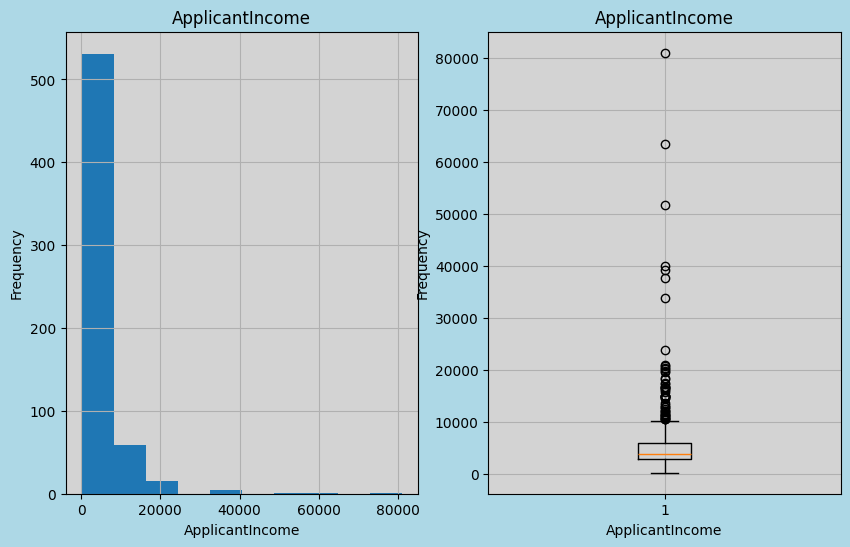

In [25]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,6))
fig.patch.set_facecolor('lightblue')

ax[0].hist(x=dataframe['ApplicantIncome'])
ax[0].set_title('ApplicantIncome')
ax[0].set_xlabel('ApplicantIncome')
ax[0].set_ylabel('Frequency')  #   ax[0:0],ax[1:1]
ax[0].grid(True)
ax[0].set_facecolor('lightgray')

ax[1].boxplot(x=dataframe['ApplicantIncome'])
ax[1].set_title('ApplicantIncome')
ax[1].set_xlabel('ApplicantIncome')
ax[1].set_ylabel('Frequency')
ax[1].grid(True)
ax[1].set_facecolor('lightgray')

In [26]:
dataframe['ApplicantIncome'].quantile(0.75)

5803.75

In [27]:
print("Beyond 75%",len(dataframe[dataframe['ApplicantIncome']>5795.0]))
print("Zero",len(dataframe[dataframe['ApplicantIncome']==0]))


Beyond 75% 154
Zero 0


## Dealing with missing values

<Axes: >

<Figure size 600x600 with 0 Axes>

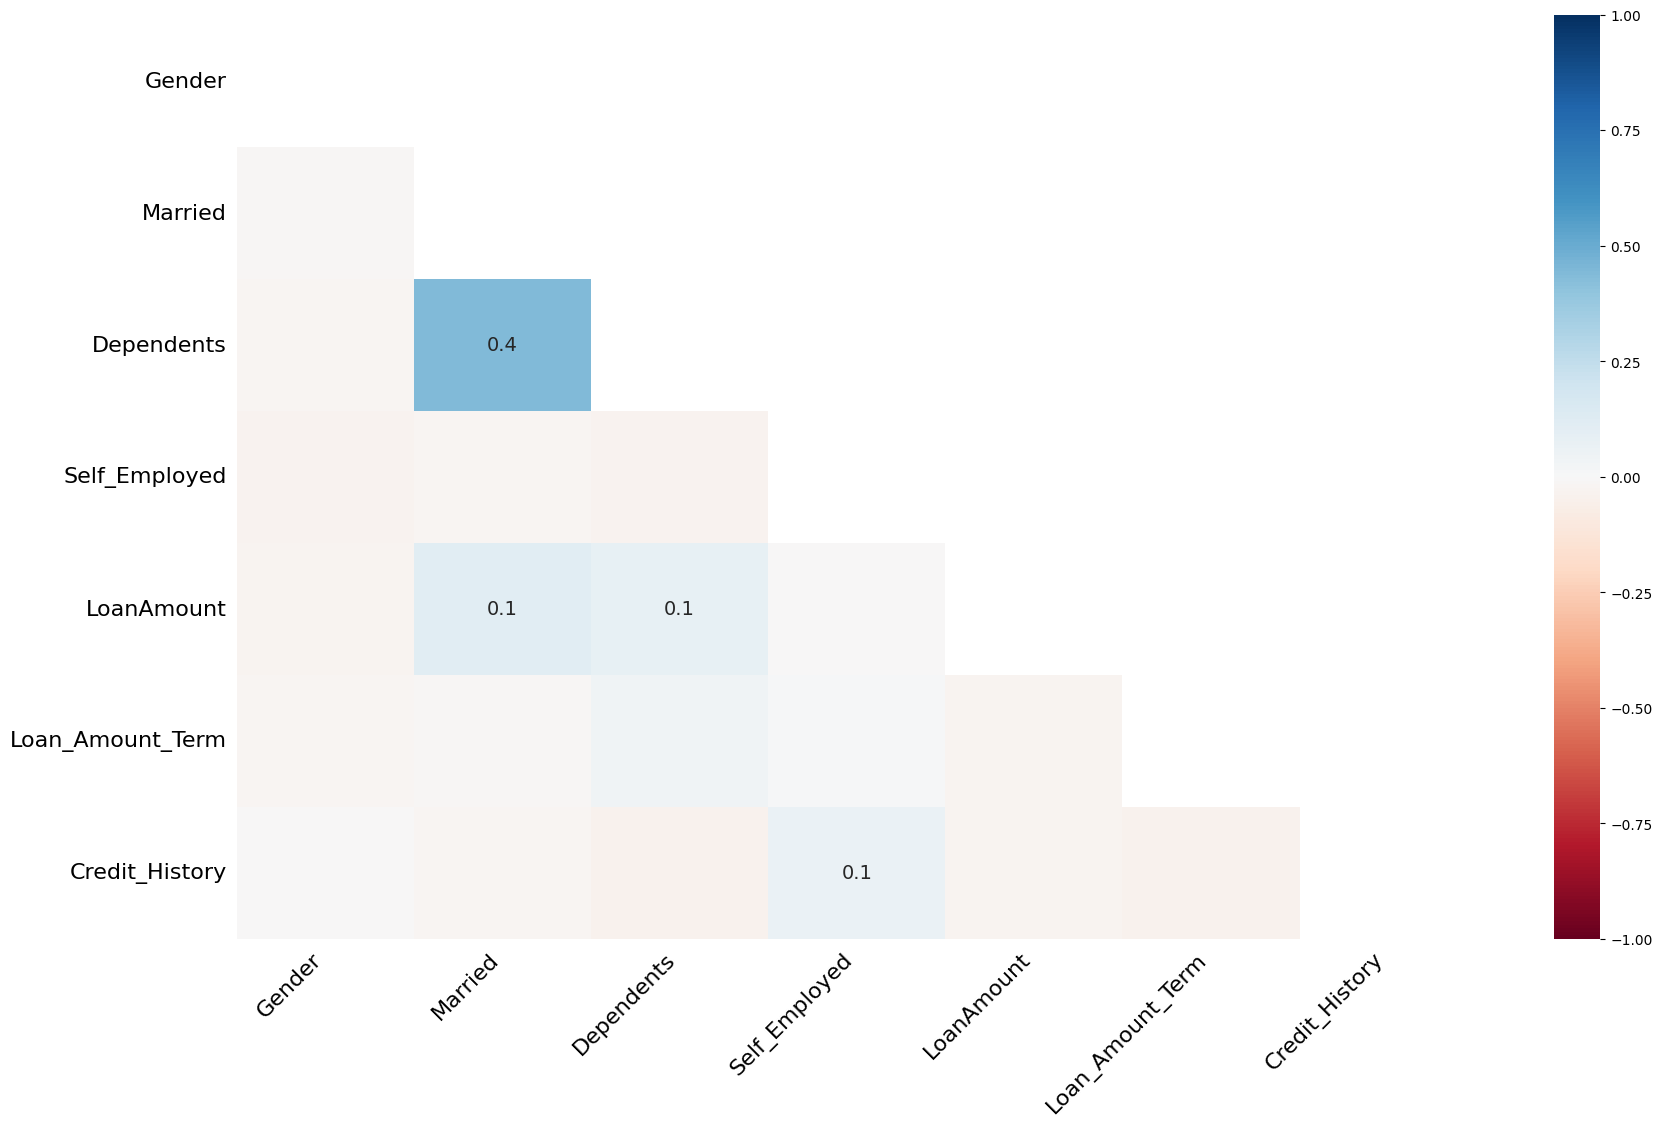

In [28]:
import missingno as msno
plt.figure(figsize=(6,6))
msno.heatmap(dataframe)
#msno.dendrogram(dataframe)
#msno.bar(dataframe)
#msno.matrix(dataframe)

In [29]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 612 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Loan_ID            612 non-null    object  
 1   Gender             599 non-null    category
 2   Married            609 non-null    category
 3   Dependents         597 non-null    category
 4   Education          612 non-null    category
 5   Self_Employed      581 non-null    category
 6   ApplicantIncome    612 non-null    int64   
 7   CoapplicantIncome  612 non-null    float64 
 8   LoanAmount         590 non-null    float64 
 9   Loan_Amount_Term   598 non-null    float64 
 10  Credit_History     563 non-null    float64 
 11  Property_Area      612 non-null    category
 12  Loan_Status        612 non-null    category
dtypes: category(7), float64(4), int64(1), object(1)
memory usage: 38.6+ KB


In [30]:
dataframe.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        31
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [31]:
dataframe['Loan_Status'].value_counts()

Loan_Status
Y    422
N    190
Name: count, dtype: int64

Gender
Male      0.814691
Female    0.185309
Name: proportion, dtype: float64

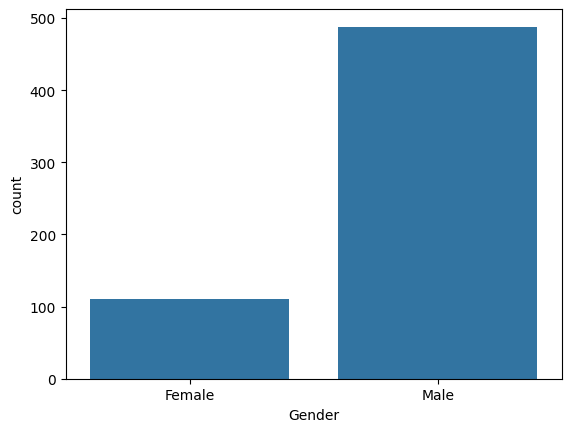

In [32]:
sns.countplot(data=dataframe,x='Gender')
dataframe['Gender'].value_counts(normalize=True)

In [33]:
0.185309 * 13

2.409017

In [34]:
  0.814691 * 13

10.590983000000001

In [35]:
missing_index=dataframe.loc[dataframe['Gender'].isnull() == True]
missing_index=missing_index.index
missing_index

Index([23, 126, 171, 188, 314, 334, 460, 467, 477, 507, 576, 588, 592], dtype='int64')

In [36]:
for i in missing_index[0:2]:
    dataframe.loc[i,"Gender"]="Female"
for i in missing_index[2:]:
    dataframe.loc[i,"Gender"]="Male"    
dataframe.isnull()    .sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        31
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [37]:
dataframe['LoanAmount']=dataframe['LoanAmount'].fillna(0)
dataframe.isnull().sum()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_55784\3084376802.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['LoanAmount']=dataframe['LoanAmount'].fillna(0)


Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        31
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [38]:
dataframe.loc[dataframe['Married'].isnull() == True]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,0.0,240.0,1.0,Semiurban,Y


In [39]:
dataframe['Married']=dataframe['Married'].cat.add_categories(["Unknown"])
dataframe['Dependents']=dataframe['Dependents'].cat.add_categories(["Unknown"])
for i in [104,228,435]:    
    dataframe.loc[i,"Married"]="Unknown"
    dataframe.loc[i,"Dependents"]="Unknown"

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_55784\2002817110.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Married']=dataframe['Married'].cat.add_categories(["Unknown"])
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_55784\2002817110.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Dependents']=dataframe['Dependents'].cat.add_categories(["Unknown"])
